In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [46]:
df = pd.read_csv("DataSets/Online Retail.csv")

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [48]:
df = df.dropna(subset=["CustomerID"])

In [49]:
df.shape

(406829, 8)

In [50]:
df.keys()

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [51]:
df[df.Quantity == df.Quantity.min()].Quantity

540422   -80995
Name: Quantity, dtype: int64

In [52]:
df = df[df.Quantity > 0]

In [53]:
df.shape

(397924, 8)

In [54]:
Sales = list(df["Quantity"].values * df["UnitPrice"].values).copy()
df["Sales"] = Sales

In [58]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01/12/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/10 8:26,3.39,17850.0,United Kingdom,20.34


In [60]:
df.CustomerID.nunique()

4339

### RFM - Recency, Frequency, Monetary 

#### 1. Monetary

In [68]:
Monetry = df.groupby("CustomerID").Sales.sum()
Monetry = Monetry.reset_index()
Monetry

,CustomerID,Sales
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2094.88


In [70]:
Frequency = df.groupby("CustomerID").InvoiceNo.count()
Frequency = Frequency.reset_index()
Frequency

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,756


In [71]:
df.keys()

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Sales'],
      dtype='object')

In [78]:
df.InvoiceDate = pd.to_datetime(df.InvoiceDate)

In [82]:
MaxDate = max(df.InvoiceDate) + pd.DateOffset(days = 1)
MaxDate

Timestamp('2011-12-11 17:19:00')

In [83]:
df["Difference"] = MaxDate - df.InvoiceDate

In [85]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Difference
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30,698 days 08:53:00
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,698 days 08:53:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00,698 days 08:53:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,698 days 08:53:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,698 days 08:53:00


In [86]:
recency = df.groupby("CustomerID").Difference.min()
recency = recency.reset_index()
recency

,CustomerID,Difference
0,12346.0,327 days 07:18:00
1,12347.0,41 days 04:54:00
2,12348.0,77 days 04:06:00
3,12349.0,20 days 07:28:00
4,12350.0,312 days 01:18:00
...,...,...
4334,18280.0,161 days 07:27:00
4335,18281.0,5 days 06:26:00
4336,18282.0,217 days 03:44:00
4337,18283.0,11 days 04:20:00


In [87]:
recency.Difference = recency.Difference.dt.days

In [89]:
recency.head(2)

,CustomerID,Difference
0,12346.0,327
1,12347.0,41


In [90]:
MF = Monetry.merge(Frequency, on = "CustomerID")

In [92]:
RMF = MF.merge(recency,on = "CustomerID")

In [94]:
RMF.columns = ["CustomerID", "Sales", "Frequency", "Recency"]

In [95]:
RMF.head()

,CustomerID,Sales,Frequency,Recency
0,12346.0,77183.60,1,327
1,12347.0,4310.00,182,41
2,12348.0,1797.24,31,77
3,12349.0,1757.55,73,20
4,12350.0,334.40,17,312


In [96]:
RMF.shape

(4339, 4)

In [98]:
### Standard Scaler 
## Out = (x - mean)/std(data)

In [99]:
from sklearn.preprocessing import StandardScaler
scaller = StandardScaler()

In [100]:
RMF_New = scaller.fit_transform(RMF)

<h2>Apply K-Means with Some K</h2>

In [106]:
from sklearn.cluster import KMeans

In [107]:
SSE = []
n = []
for i in range(1,11):
    n.append(i)
    model = KMeans(n_clusters=i)
    model.fit(RMF_New)
    SSE.append(model.inertia_)

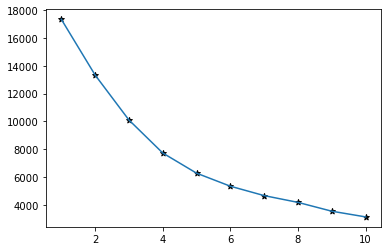

In [108]:
plt.plot(n, SSE)
plt.scatter(n, SSE, marker="*", color = "k")
plt.show()

In [116]:
model = KMeans(n_clusters=5)
Cluster_Id = model.fit_predict(RMF_New)

In [117]:
RMF["ClusterId"] = Cluster_Id

In [118]:
RMF.ClusterId.unique()

array([1, 2, 3, 4, 0], dtype=int32)

In [119]:
RMF

,CustomerID,Sales,Frequency,Recency,ClusterId
0,12346.0,77183.60,1,327,1
1,12347.0,4310.00,182,41,1
2,12348.0,1797.24,31,77,1
3,12349.0,1757.55,73,20,1
4,12350.0,334.40,17,312,2
...,...,...,...,...,...
4334,18280.0,180.60,10,161,0
4335,18281.0,80.82,7,5,0
4336,18282.0,178.05,12,217,0
4337,18283.0,2094.88,756,11,0


In [120]:
All_Sales = RMF.groupby("ClusterId").Sales.mean()
All_Frequency = RMF.groupby("ClusterId").Frequency.mean()
All_Recency = RMF.groupby("ClusterId").Recency.mean()

In [121]:
final_data = pd.DataFrame({
    "Sales":All_Sales,
    "Frequency":All_Frequency,
    "Recency":All_Recency
})

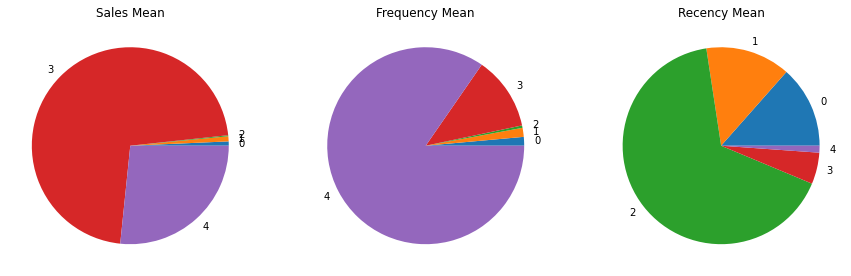

In [127]:
fig = plt.figure(figsize=(15, 5))

plot1 = fig.add_subplot(1, 3, 1)
plt.title("Sales Mean")
plot1.pie(final_data.Sales, labels = [0, 1, 2, 3, 4])

plot2 = fig.add_subplot(1, 3, 2)
plt.title("Frequency Mean")
plot2.pie(final_data.Frequency, labels = [0, 1, 2, 3, 4])

plot3 = fig.add_subplot(1, 3, 3)
plt.title("Recency Mean")
plot3.pie(final_data.Recency, labels = [0, 1, 2, 3, 4])


plt.show()